## [Decision Tree in Sklearn](https://scikit-learn.org/stable/modules/tree.html#tree-regression)

Sklearn employs an optimized version of the CART (Classification and Regression Trees) algorithm. Here's a simplified overview of how sklearn builds a decision tree using this algorithm:

1. **Starting at the Root**: The process begins with the root node, which includes the entire dataset. The goal is to find the best feature to split the data based on some criteria.

2. **Choosing the Best Split**: To decide how to split the data at each node, CART evaluates each feature's potential as a candidate for splitting. It does this by calculating a metric (like Gini impurity for classification or Mean Squared Error for regression) for each possible split across all features. The aim is to determine the split that most effectively separates the dataset into groups (for classification) or reduces variance (for regression).

3. **Recursive Splitting**: Once the best split is determined, the dataset is divided into two subsets based on the split criterion. This process is recursively applied to each subset, creating a tree structure with new nodes.

4. **Termination Criteria**: The recursive splitting doesn't go on indefinitely. It stops when a termination criterion is met, such as:
   - The node is pure (all samples in the node belong to the same class), thus no further splitting is needed.
   - The depth of the tree reaches a predefined maximum depth.
   - The number of samples in a node falls below a predefined threshold.
   - Further splitting does not improve impurity measures significantly.

5. **Pruning**: To avoid overfitting, sklearn's decision trees can also undergo pruning. Pruning is a process where parts of the tree that provide little power in predicting target values are removed. Sklearn supports post-pruning, which involves building the tree first and then removing non-critical nodes.

6. **Result**: The end result is a decision tree that can be used for predicting outcomes based on the decision rules derived from the training data.

## DecisionTreeClassifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')


# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data
url = 'https://drive.google.com/file/d/1dSzj_49Z2FAZyCS5dkEWXWo5NhCSeIJd/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# load dataset
df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Train

In [3]:
#split dataset in features and target variable
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']


In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = clf.fit(X_train,y_train)


In [6]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6822916666666666


### Visualizing the Tree

In [7]:
graph, = print_tree(clf, features=X.columns)
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7135416666666666


In [ ]:
y_train.value_counts()

Outcome
0    377
1    199
Name: count, dtype: int64

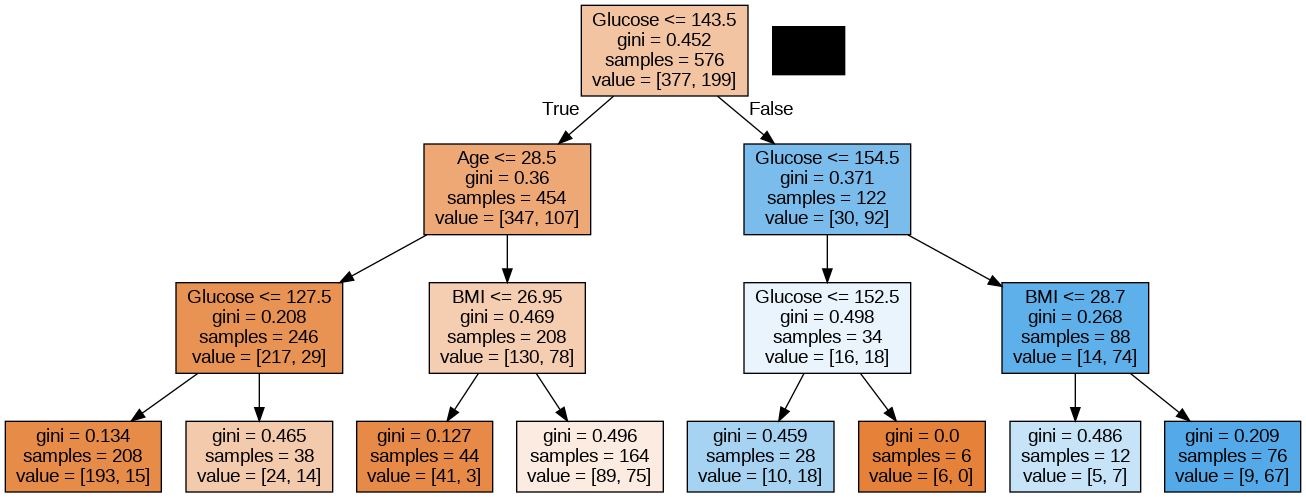

In [ ]:
graph, = print_tree(clf, features=X.columns)
Image(graph.create_png())

## Regressor

In [ ]:
url = 'https://drive.google.com/file/d/1Vjft1tfHaPhzDJIfsONCDoIHBvOXPtfM/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.dropna(inplace=True)
df

,Hits,Years,Salary
1,81,14,475.0
2,130,3,480.0
3,141,11,500.0
4,87,2,91.5
5,169,11,750.0
...,...,...,...
317,127,5,700.0
318,136,12,875.0
319,126,6,385.0
320,144,8,960.0


In [8]:
X = df[['Years', 'Hits']]
y = df.Salary

KeyError: "None of [Index(['Years', 'Hits'], dtype='object')] are in the [columns]"

In [ ]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [ ]:
regr.predict([[7,119]])

array([949.17075904])

In [ ]:
df[df['Years']<=4.5]['Salary'].mean()

225.83147777777776

### Visualizing the Tree

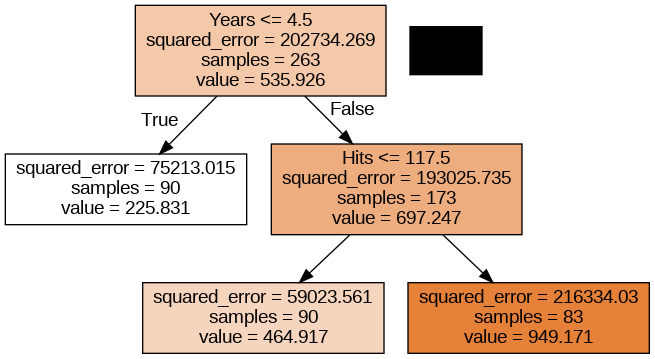

In [ ]:
graph, = print_tree(regr, features=X.columns)
Image(graph.create_png())